FIND MOST INFLUENCIAL / APPROPRIATE FEATURE (LASSO/ ELASTICNET REG.)

In [4]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [5]:
df=read_csv('boston_houses.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
x=df.iloc[: , 1:14]
#y=df.iloc[: , 14]
y=(df['MEDV'])

In [7]:
names=x.columns
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT'],
      dtype='object')

In [8]:
rng=range(len(names))
rng

range(0, 13)

In [9]:
from sklearn.linear_model  import Lasso
ls=Lasso(alpha=0.1)

In [10]:
l=ls.fit(x,y)

In [11]:
l.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

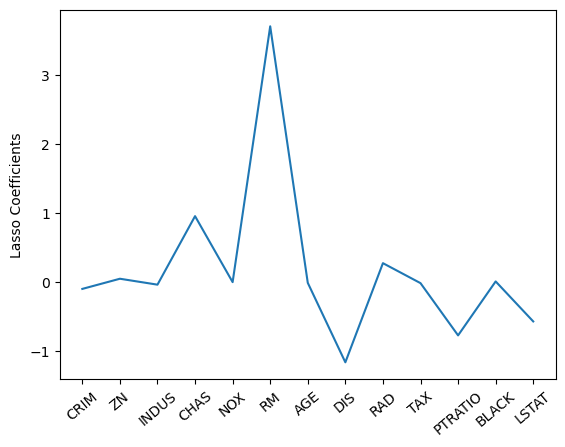

In [12]:
plot(rng,l.coef_)
xticks(rng,names,rotation=40)
ylabel('Lasso Coefficients')
show()

ORDER OF INFLUENCE OF ATTRIBUTES-   'RM' , 'CHAS' , 'RD' , ............

In [13]:
l.score(x,y)

0.7269834862602695

In [14]:
pred=[[0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14]]

In [15]:
l.predict(pred)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([24.71246809])

In [16]:

r2=PolynomialFeatures(degree=6)
x2=r2.fit_transform(x)     

In [17]:
l=LinearRegression()
l.fit(x2,y)
l.score(x2,y)

1.0

In [18]:
r=LinearRegression()
r.fit(x,y)
r.score(x,y)

0.7406426641094095

In [19]:
r.predict(pred)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.02556238])

Random Forest!

In [27]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=9,random_state=4)
r.fit(x,y)

RandomForestRegressor(n_estimators=9, random_state=4)

In [28]:
r.score(x,y)

0.9801681864799445

In [29]:
r.predict(pred)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([22.26666667])

In [30]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [22]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
max_accuracy = 0  # Initialize maximum accuracy

for i in range(1,10):  # Replace 'some_range' with the desired range
    r.set_params(random_state=i)  # Set random state for each iteration
    r.fit(x, y)  # Assuming you have training data X_train and corresponding labels y_train
    accuracy = r.score(x, y)  # Evaluate accuracy on test data

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_random_state = i

print(f"Maximum Accuracy: {max_accuracy} achieved with random state: {best_random_state}")


Maximum Accuracy: 0.9850674655467497 achieved with random state: 4


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

r = RandomForestRegressor()
max_accuracy = 0  # Initialize maximum accuracy

best_random_state = 0
best_n_estimators = 0


for i in range(1, 10):  # Vary random state
    for n_estimators in range(1, 10):  # Vary number of estimators
        r.set_params(random_state=i, n_estimators=n_estimators)  # Set random state and n_estimators
        r.fit(x, y)  # Fit the model
        accuracy = r.score(x, y)  # Evaluate accuracy on test data

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_random_state = i
            best_n_estimators = n_estimators

print(f"Maximum Accuracy: {max_accuracy} achieved with random state: {best_random_state} and n_estimators: {best_n_estimators}")


Maximum Accuracy: 0.9801681864799445 achieved with random state: 4 and n_estimators: 9
